## Topic: Obesity Related Hospital Admissions (England) 
---

### Description of world obesity trends :
According to the studies conducted by Global Burden of Disease (2017), they found that the number of people affected by obesity has doubled since 1980 in 73 countries and women are more likely to be obese than men across all age groups. Besides, although the childhood obesity rates were lower than the adults, the rates have increased over the years. <br/>
Obesity is a serious problem since it might lead to several non-communicable diseases, such as heart disease, stroke, cancer, chronic respiratory diseases and diabetes which are the leading cause of mortality in the world. According to WTO, at least 2.8 million people die of being overweight or obese each year. This suggests that obesity is a global issue and governments should tackle it immediately, or we may be facing a wave of obesity in the coming years.

### Objective of this research:
1. Discovered the trend of three types of obesity admissions[^1] over the years (2002/13-2015/16) for all populations and for young people
2. Compared three types of obesity admissions between different genders and age groups
3. Compared the numbers of obesity related admissions by region

[^1]: Three types of obesity admissions  <br/>
FAE_Primary_Obesity (Admissions directly attributed to obesity) <br/>
FAE_PrimarySecondary_Obesity (Admissions where obesity was a factor) <br/>
FCE_PrimarySecondary_Obesity_Bariatric (Obesity related bariatric surgery)

### Datasets used in this report:
In this project, I use three datasets obtained from [National Health Service](https://digital.nhs.uk/catalogue/PUB23742) (NHS).
* Datasets 1 (Time series data): contains obesity related admissions from 2002/13-2015/16 for England (meausre in national scope).
* Datasets 2 (CCG data): contains only 2015/16 data but include local areas, regions and nationwide.
* Datasets 3 (LA data): 

### Variables used in these datasets as belows:

|<center> Definition of| Variables used in the datasets|
|:------------|:-------------------------------------------------------------------------------------------| 
| <center>   Year     | Financial year within which the episode finished|
| <center>   ONS_Code  | ONS nine-character geographic code|
| <center>  Org_Code  | ODS organisational code|
| <center>  Org_Name   | ODS organisational name|
| <center>  Org_Type   | ODS organisational type|
| <center>Classification|Measure by which the metrics can be broken down by: <br/><br/> FAE_Primary_Obesity – Finished Admission Episodes with a primary diagnosis of Obesity <br/> (Admissions directly attributed to obesity) <br/><br/> FAE_PrimarySecondary_Obesity - Finished Admission Episodes with a primary or secondary diagnosis of obesity  <br/> (Admissions where obesity was a factor) <br/><br/> FCE_PrimarySecondary_Obesity_Bariatric - Finished Consultant Episodes with a primary diagnosis of obesity and a main or secondary procedure of 'Bariatric Surgery' <br/> (Obesity related bariatric surgery)|
| <center> Metric_Primary|Demographic by which the data is presented (gender or age group)|
| <center>Metric_Secondary|Demographic breakdown|
| <center>Value|Number of admissions for each Classification/Metric|


* Note: 
    1. Org_Type. Org_Name, Org_Code different between three datasets
    2. Both CGG and LA datasets have missing value

## Questions for Time Series Dataset
1. check doc 'obes-phys-acti-diet-eng-2017-rep' p8,p9, p16
2. Do analysis by age group, gender, by different year, calculate increased percentage

## Questions for CGG Dataset
1. Calculate Obesity Prevalence by region (check doc 'obes-phys-acti-diet-eng-2017-rep' p15)

## Difference between df1 & df2 -> only the region
1. df1 only include England, while df2 include other part of England (south England...)
2. df1 include different time span, but df2 only include 2015/16
3. df2 have missing value on Org_Type, Value


## Relation b/w df1 & df2
1. df2 only contains part of df1 (2015/16 data and Metric_Primary=='Gender')
2. df2 contains other Org_Type while df1 only contains Org_Type=='Nation'


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
## read library ##

import pandas as pd
import numpy as np
import os

## read data ##

#path="/Users/chloe/Desktop/ST445_Project"
path='/Users/lin/Desktop/ST445_Project' # another laptop
os.chdir(path)
df1 = pd.read_csv('Time_series_data_1516.csv', sep=',') # Time Series Dataset
df2 = pd.read_csv('CCG_data_1516.csv', sep=',') # CCG: Clinical Commissioning Groups
df3 = pd.read_csv('LA_data_1516.csv', sep=',')
all = [df1, df2, df3]

In [3]:
## check dimension and missing value ##
for df in all:
    print(df.shape)
for df in all:
    print(df.isnull().sum())

(462, 16)
(2043, 8)
(1458, 8)
Year                  0
ONS_Code              0
Org_Code              0
Org_Name              0
Classification        0
Metric_Primary        0
Metric_Secondary      0
Value                 0
Unnamed: 8          462
Unnamed: 9          462
Unnamed: 10         462
Unnamed: 11         462
Unnamed: 12         462
Unnamed: 13         462
Unnamed: 14         462
Unnamed: 15         462
dtype: int64
Year              0
Org_Type          0
ONS_Code          0
Org_Code          9
Org_Name          0
Classification    0
Metric_Primary    0
Value             0
dtype: int64
Year              0
Org_Type          0
ONS_Code          0
Org_Code          9
Org_Name          0
Classification    0
Metric_Primary    0
Value             0
dtype: int64


In [4]:
## drop extra columns in df1 ##

df1.drop(df1.columns[[8,9,10,11,12,13,14,15]], axis=1, inplace=True)

## sort the time series data by year, classification, metric_primary and reset index 
## because sort will change the order##

df1 = df1.sort_index(by=['Year','Classification','Metric_Primary']).reset_index(drop=True)

/Users/lin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  


## Analyse Dataset1
---

### Observe the trend of Obesity related hospital admissions over the year
(1) Sum value by 'Year' & 'Clssification' when Metric_Primary==AgeGroup <br/>
    -> the result should be the same as the value when Metric_Primary==Gender & Metric_Secondary==All persons<br/> 
    -> However, it seems that the results calculated by us are slightly different from the given
    
(2) Pivot df1_s <br/>
    -> 2.1 plot the data (with three classes) <br/>
    -> 2.2 plot the data but separate three classes
    
### Observe the Obesity related hospital admissions by gender
  
(3) Plot pie chart of different gender for three different classes <br/> (FAE_PrimarySecondary_Obesity, FAE_Primary_Obesity, FCE_PrimarySecondary_Obesity_Bariatric)

### Observe the Obesity related hospital admissions by gender

(4) Plot the bar chart of different age groups for three different classes

### Observe the Obesity related hospital admissions for young people over the period 
(5) Plot lines for different classes over the period of young people

In [5]:
## 1 ##
df1_s = df1[df1.Metric_Primary=='AgeGroup'].groupby(['Year', 'Classification']).agg({'Value': sum}).rename(columns={'Value': 'Count'}).reset_index()

df1 = pd.merge(df1, df1_s, how='left', on=['Year', 'Classification']) # merge count to df1
df1[df1.Metric_Secondary=='All persons'].head(5) # slight difference b/w value and count
#df0 = df1.loc[df1['Metric_Primary']=='AgeGroup'].groupby(['Year', 'Classification'])[['Value']].sum().rename(columns={'Value': 'Count'}).reset_index()

,Year,ONS_Code,Org_Code,Org_Name,Classification,Metric_Primary,Metric_Secondary,Value,Count
8,2002/03,E92000001,ENG,England,FAE_PrimarySecondary_Obesity,Gender,All persons,29237,29199
19,2002/03,E92000001,ENG,England,FAE_Primary_Obesity,Gender,All persons,1275,1275
30,2002/03,E92000001,ENG,England,FCE_PrimarySecondary_Obesity_Bariatric,Gender,All persons,345,345
41,2003/04,E92000001,ENG,England,FAE_PrimarySecondary_Obesity,Gender,All persons,33546,33524
52,2003/04,E92000001,ENG,England,FAE_Primary_Obesity,Gender,All persons,1711,1711


In [6]:
## 2 ##
df1_sp = df1_s.pivot(index='Classification', columns='Year', values='Count')
df1_sp

Year,2002/03,2003/04,2004/05,2005/06,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16
Classification,,,,,,,,,,,,,,
FAE_PrimarySecondary_Obesity,29199,33524,40724,51997,67163,80772,102834,142061,211499,266659,292396,365568,440273,524704
FAE_Primary_Obesity,1275,1711,2034,2561,3862,5014,7985,10569,11566,11736,10957,9325,9130,9929
FCE_PrimarySecondary_Obesity_Bariatric,345,474,743,1035,1951,2722,4219,7213,8082,8794,8024,6384,6032,6438


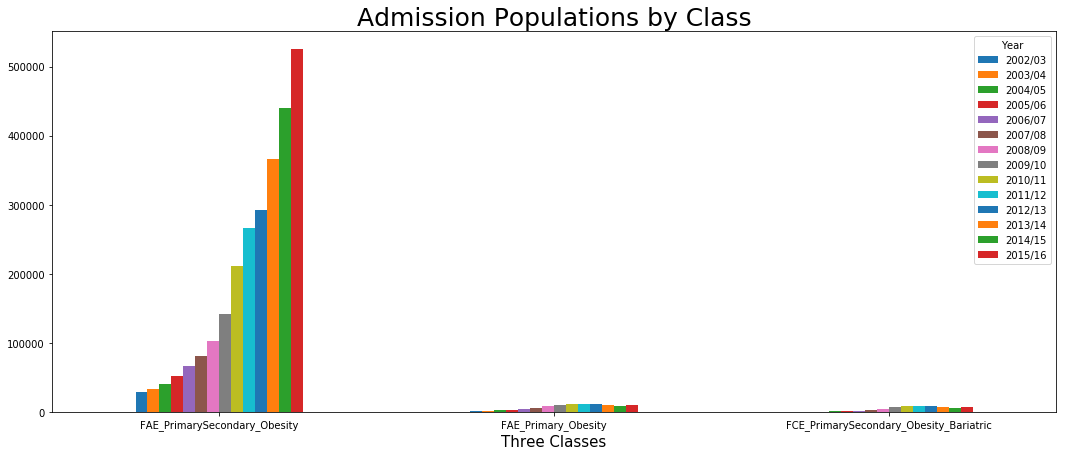

In [7]:
## 2.1 ##
import matplotlib.pyplot as plt
%matplotlib inline

df1_sp.plot(kind='bar', figsize=(18, 7))
plt.xticks(rotation=0) 
plt.xlabel('Three Classes', fontsize=15)
plt.title('Admission Populations by Class', fontsize=25)
plt.show()
#df1_sp.unstack('index').plot(kind='bar', figsize=(18, 7))

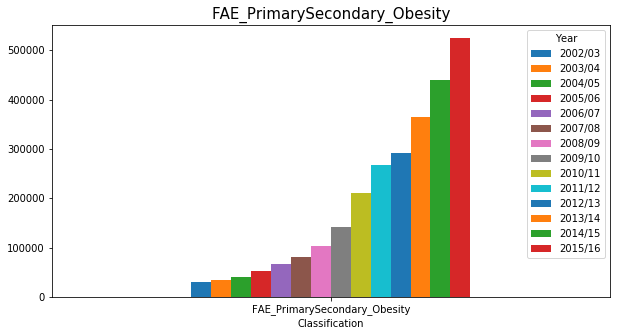

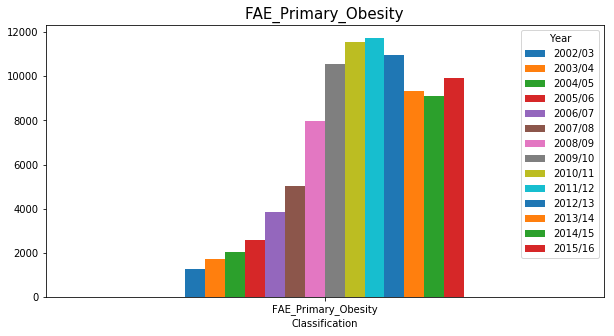

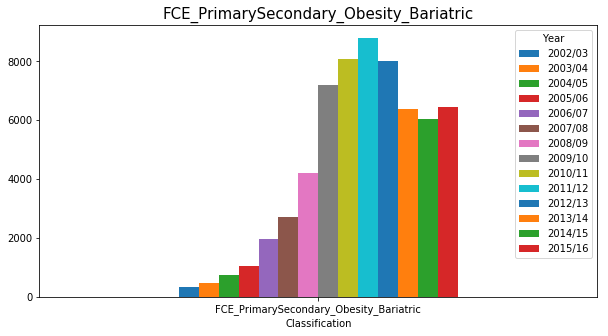

In [8]:
## 2.2 ## 
plt.figure()
df1_sp_ps = df1_sp[df1_sp.index =='FAE_PrimarySecondary_Obesity']
df1_sp_ps.plot(kind='bar', figsize=(10, 5))
plt.title('FAE_PrimarySecondary_Obesity', fontsize=15)
plt.xticks(rotation=0) 

df1_sp_p = df1_sp[df1_sp.index =='FAE_Primary_Obesity']
df1_sp_p.plot(kind='bar', figsize=(10, 5))
plt.title('FAE_Primary_Obesity', fontsize=15)
plt.xticks(rotation=0) 

df1_sp_psb = df1_sp[df1_sp.index =='FCE_PrimarySecondary_Obesity_Bariatric']
df1_sp_psb.plot(kind='bar', figsize=(10, 5))
plt.title('FCE_PrimarySecondary_Obesity_Bariatric', fontsize=15)
plt.xticks(rotation=0) 
plt.show()

In [9]:
## 3 ##
df1_g = df1[(df1.Metric_Primary=='Gender') & (df1.Metric_Secondary!='All persons')].drop(['ONS_Code','Org_Code','Org_Name','Metric_Primary','Count'], axis=1).reset_index(drop=True)

#df1_g_c = df1_g.groupby(['Metric_Secondary', 'Classification']).agg({'Value': sum}).rename(columns={'Value': 'Count by different class and gender'}).reset_index()
df1_g_c = df1_g.groupby(['Metric_Secondary', 'Classification']).mean().rename(columns={'Value': 'Count by different class and gender (average value)'}).reset_index()
df1_g_c = df1_g_c.sort_values(by=['Classification'])
df1_g_c = df1_g_c.round(1)

# separate different class
df1_g_c_ps = df1_g_c[df1_g_c.Classification=='FAE_PrimarySecondary_Obesity']
df1_g_c_p = df1_g_c[df1_g_c.Classification=='FAE_Primary_Obesity']
df1_g_c_psb = df1_g_c[df1_g_c.Classification=='FCE_PrimarySecondary_Obesity_Bariatric']

Text(0.5,1,'FCE_PrimarySecondary_Obesity_Bariatric by Gender')

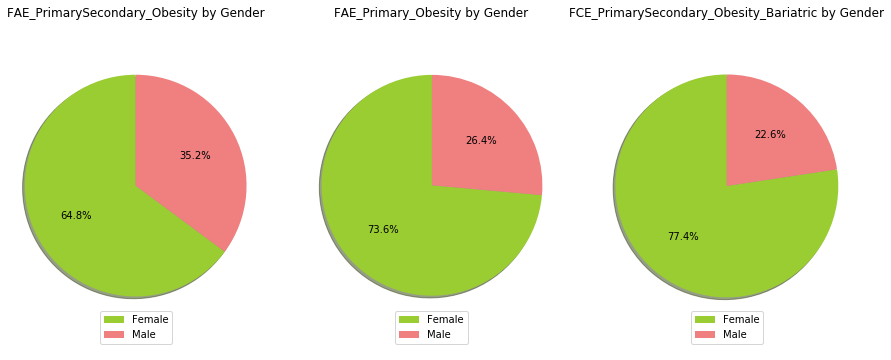

In [10]:
# plot pie chart
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
colors = ['yellowgreen', 'lightcoral']

plt.subplot(131)
patches, texts, junk = plt.pie(df1_g_c_ps['Count by different class and gender (average value)'], 
                         colors=colors, shadow=True, startangle=90, autopct='%1.1f%%')
plt.legend(patches, df1_g_c_ps['Metric_Secondary'] , loc="lower center")
plt.axis('equal')
plt.title('FAE_PrimarySecondary_Obesity by Gender', fontsize=12)


plt.subplot(132)
patches, texts, junk = plt.pie(df1_g_c_p['Count by different class and gender (average value)'], 
                               colors=colors, shadow=True, startangle=90, autopct='%1.1f%%')
plt.legend(patches, df1_g_c_p['Metric_Secondary'] , loc="lower center")
plt.axis('equal')
plt.title('FAE_Primary_Obesity by Gender', fontsize=12)


plt.subplot(133)
patches, texts, junk = plt.pie(df1_g_c_psb['Count by different class and gender (average value)'], 
                               colors=colors, shadow=True, startangle=90, autopct='%1.1f%%')
plt.legend(patches, df1_g_c_psb['Metric_Secondary'] , loc="lower center")
plt.axis('equal')
plt.title('FCE_PrimarySecondary_Obesity_Bariatric by Gender', fontsize=12)

In [11]:
## 4 ##

# Extract AgeGroup from df1
df1_AG = df1[df1.Metric_Primary=='AgeGroup']
df1_AG = df1_AG.drop(['ONS_Code','Org_Code','Org_Name','Count'], axis=1)

# see the average trend for each age group of obesity related hospital admissions
df1_AG_s = df1_AG.groupby(['Classification', 'Metric_Secondary']).mean().rename(columns={'Value': 'Average Value for each age group'}).reset_index()
df1_AG_s = df1_AG_s.round(0) 

# separate different obesity related hospital admissions
df1_AG_sps = df1_AG_s[df1_AG_s.Classification=='FAE_PrimarySecondary_Obesity']  
df1_AG_sp = df1_AG_s[df1_AG_s.Classification=='FAE_Primary_Obesity']  
df1_AG_spsb = df1_AG_s[df1_AG_s.Classification=='FCE_PrimarySecondary_Obesity_Bariatric']                                      

[Text(0,0.5,'Age Group'),
 Text(0.5,0,'Average Value'),
 Text(0.5,1,'FCE_PrimarySecondary_Obesity_Bariatric by age group')]

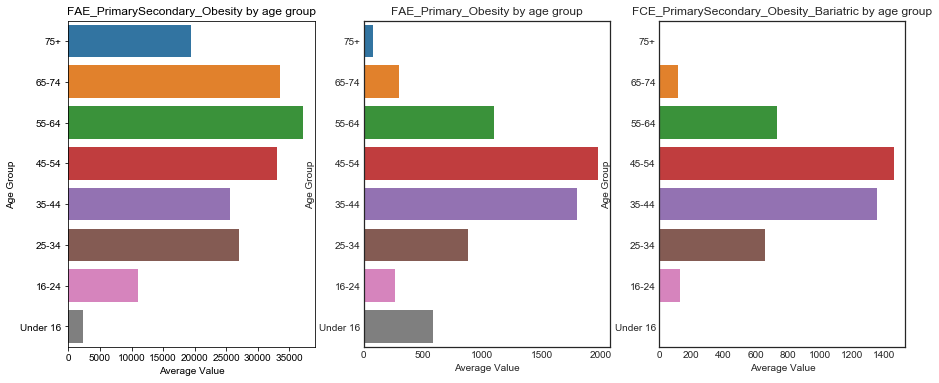

In [12]:
# plot
import seaborn as sns
#sns.set()

fig, ax = plt.subplots(figsize=(15, 6))

plt.subplot(131)
sns.set_style('white')
bar_plot = sns.barplot(x='Average Value for each age group', y='Metric_Secondary', data=df1_AG_sps,
           order=['75+','65-74','55-64','45-54','35-44','25-34','16-24','Under 16'])
bar_plot.set(xlabel='Average Value', ylabel='Age Group', title='FAE_PrimarySecondary_Obesity by age group')

plt.subplot(132)
bar_plot = sns.barplot(x='Average Value for each age group', y='Metric_Secondary', data=df1_AG_sp,
           order=['75+','65-74','55-64','45-54','35-44','25-34','16-24','Under 16'])
bar_plot.set(xlabel='Average Value', ylabel='Age Group', title='FAE_Primary_Obesity by age group')

plt.subplot(133)
bar_plot = sns.barplot(x='Average Value for each age group', y='Metric_Secondary', data=df1_AG_spsb,
           order=['75+','65-74','55-64','45-54','35-44','25-34','16-24','Under 16'])
bar_plot.set(xlabel='Average Value', ylabel='Age Group', title='FCE_PrimarySecondary_Obesity_Bariatric by age group')

Text(0.5,1,'Populations of obesity related hospital admissions for young people from (2002-2015)')

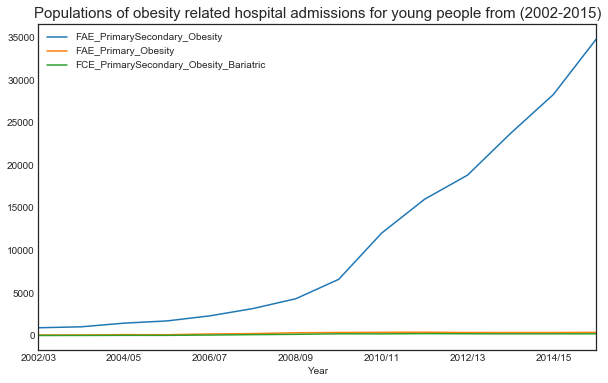

In [13]:
## 5 ##

# Populations of obesity related admission for young people over the period
df1_AG_Y = df1_AG[df1_AG.Metric_Secondary=='16-24']
df1_AG_Y = df1_AG_Y.drop(['Metric_Primary','Metric_Secondary'], axis=1)

df1_AG_Y.set_index('Year', inplace=True)
df1_AG_Y.groupby('Classification')['Value'].plot(legend=True,figsize=(10, 6))
plt.title('Populations of obesity related hospital admissions for young people from (2002-2015)', fontsize=15)

/Users/lin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Text(0.5,1,'Populations of obesity related hospital admissions (without FAE_PrimarySecondary_Obesity) for young people (2002-2015)')

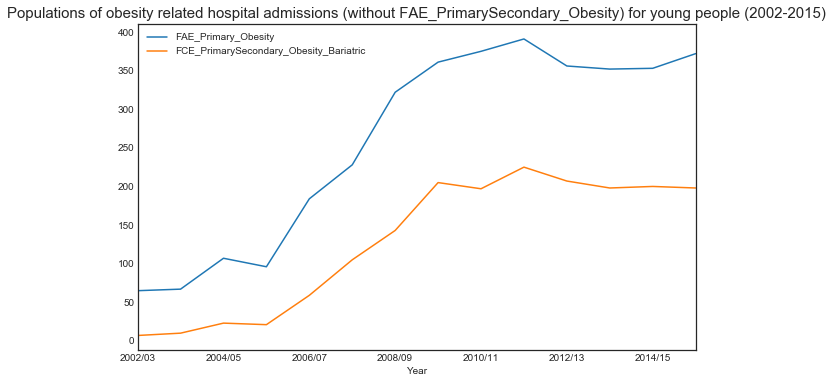

In [14]:
df1_AG_Y = df1_AG[(df1_AG.Metric_Secondary == '16-24')]
df1_AG_Y_eps = df1_AG_Y[df1_AG.Classification != 'FAE_PrimarySecondary_Obesity']
df1_AG_Y_eps = df1_AG_Y_eps.drop(['Metric_Primary','Metric_Secondary'], axis=1)

df1_AG_Y_eps.set_index('Year', inplace=True)
df1_AG_Y_eps.groupby('Classification')['Value'].plot(legend=True,figsize=(10, 6))
plt.title('Populations of obesity related hospital admissions (without FAE_PrimarySecondary_Obesity) for young people (2002-2015)', fontsize=15)

## Analyze dataset2
---
(1) Relationship between df1 and df2: df1 contains time series data for Org_Type=='Nationl' while df2 contains only 2015/16 data but include other Org_Type (i.e. CCG, CommissioningRegion, National and Region)

(2) Before plotting, we need to deal with missing value in df2. In df2 'Value column', there are some column with * -> replace it with NA and drop it. Moreover, the format of Value include comma, to sum the value, we need to delete comma and change the type of that columns.

(3) Plot to see whether different Org_Type have different value for each class

In [15]:
## 1 ## 
# We can create Org_Type=='National' in df2 by df1
df1_t = df1[df1.Year=='2015/16']
df1_t = df1_t[df1_t.Metric_Primary=='Gender']
df1_t

,Year,ONS_Code,Org_Code,Org_Name,Classification,Metric_Primary,Metric_Secondary,Value,Count
437,2015/16,E92000001,ENG,England,FAE_PrimarySecondary_Obesity,Gender,All persons,524725,524704
438,2015/16,E92000001,ENG,England,FAE_PrimarySecondary_Obesity,Gender,Male,175401,524704
439,2015/16,E92000001,ENG,England,FAE_PrimarySecondary_Obesity,Gender,Female,349279,524704
448,2015/16,E92000001,ENG,England,FAE_Primary_Obesity,Gender,All persons,9929,9929
449,2015/16,E92000001,ENG,England,FAE_Primary_Obesity,Gender,Male,2573,9929
450,2015/16,E92000001,ENG,England,FAE_Primary_Obesity,Gender,Female,7356,9929
459,2015/16,E92000001,ENG,England,FCE_PrimarySecondary_Obesity_Bariatric,Gender,All persons,6438,6438
460,2015/16,E92000001,ENG,England,FCE_PrimarySecondary_Obesity_Bariatric,Gender,Male,1418,6438
461,2015/16,E92000001,ENG,England,FCE_PrimarySecondary_Obesity_Bariatric,Gender,Female,5020,6438


In [16]:
## 2 ##
df2 = pd.read_csv('CCG_data_1516.csv', sep=',')
df2 = df2.sort_index(by=['Org_Name','Org_Type'])
df2 = df2.reset_index(drop=True)

# have * in Value column -> replace * with NA in Value column and drop NA
df2['Revised_Value'] = df2.Value.replace('*', 'NA')
df2_r = df2[df2.Revised_Value!='NA']
df2_r = df2_r[df2_r.Metric_Primary=='All persons']
df2_r.head(3) # comma in Value

# deal with comma in value so that we can sum it
df2_r['Value'] = df2_r['Value'].str.replace(',','')
df2_r.head(3)
df2_r['Value'] = df2_r['Value'].astype(int)
print(df2_r.dtypes)

Year              object
Org_Type          object
ONS_Code          object
Org_Code          object
Org_Name          object
Classification    object
Metric_Primary    object
Value              int64
Revised_Value     object
dtype: object


/Users/lin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  


In [17]:
df2_r = df2_r.sort_index(by=['Org_Type','Classification'])
df2_a = df2_r.groupby(['Org_Type', 'Classification']).sum().rename(columns={'Value': 'Count'}).reset_index()

# prepare for plot
df2_a_p = df2_a.pivot(index='Classification', columns='Org_Type', values='Count')
df2_a_p

/Users/lin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


Org_Type,CCG,CommissioningRegion,National,Region
Classification,,,,
FAE_PrimarySecondary_Obesity,524598,524598,524725,524598
FAE_Primary_Obesity,9887,9929,9929,9929
FCE_PrimarySecondary_Obesity_Bariatric,6389,6438,6438,6438


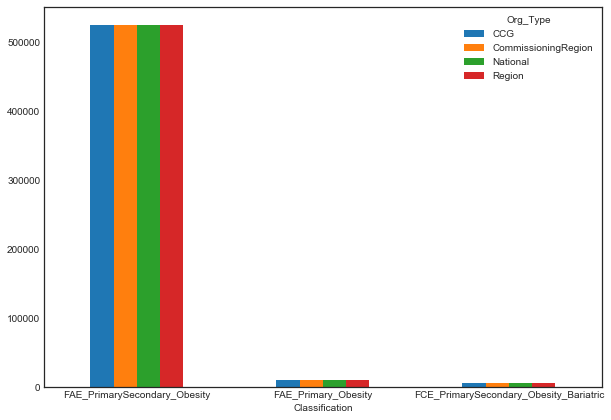

In [20]:
## 3 ##
df2_a_p.plot(kind='bar', figsize=(10, 7))
plt.xticks(rotation=0) 
#plt.xlabel('Three Classes', fontsize=15)
#plt.title('Admission Populations by Class', fontsize=25)
plt.show()

#############################################################################################################

In [14]:
df2_A = df2[df2.Metric_Primary=='All persons']
df2_G = df2[df2.Metric_Primary!='All persons']
df2_A

,Year,Org_Type,ONS_Code,Org_Code,Org_Name,Classification,Metric_Primary,Value
0,2015/16,National,E92000001,NaN,ENGLAND,FAE_Primary_Obesity,All persons,"9,929"
3,2015/16,National,E92000001,NaN,ENGLAND,FAE_PrimarySecondary_Obesity,All persons,"524,725"
6,2015/16,National,E92000001,NaN,ENGLAND,FCE_PrimarySecondary_Obesity_Bariatric,All persons,"6,438"
9,2015/16,CommissioningRegion,E40000003,Y56,London,FAE_Primary_Obesity,All persons,"2,127"
12,2015/16,CommissioningRegion,E40000003,Y56,London,FAE_PrimarySecondary_Obesity,All persons,"53,267"
15,2015/16,CommissioningRegion,E40000003,Y56,London,FCE_PrimarySecondary_Obesity_Bariatric,All persons,"1,400"
18,2015/16,CommissioningRegion,E40000002,Y55,Midlands and East of England,FAE_Primary_Obesity,All persons,"2,535"
21,2015/16,CommissioningRegion,E40000002,Y55,Midlands and East of England,FAE_PrimarySecondary_Obesity,All persons,"177,044"
24,2015/16,CommissioningRegion,E40000002,Y55,Midlands and East of England,FCE_PrimarySecondary_Obesity_Bariatric,All persons,"1,802"
27,2015/16,CCG,E38000001,02N,"NHS Airedale, Wharfedale and Craven",FAE_Primary_Obesity,All persons,18


In [130]:
df3 = df3.sort_index(by=['Org_Name'])

# data are all 2015/16
df3_p_name = df3[df3.Metric_Primary=='All persons'].pivot(index='Org_Name', columns='Classification', values='Value').reset_index()
#df3_p_type = df3[df3.Metric_Primary=='All persons'].pivot(index=['Org_Type','Org_Name'], columns='Classification', values='Value').reset_index()


/Users/lin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


In [131]:
df3

,Year,Org_Type,ONS_Code,Org_Code,Org_Name,Classification,Metric_Primary,Value
1237,2015/16,LocalAuthority,E09000002,716,Barking and Dagenham,FCE_PrimarySecondary_Obesity_Bariatric,Female,*
1075,2015/16,LocalAuthority,E09000002,716,Barking and Dagenham,FCE_PrimarySecondary_Obesity_Bariatric,All persons,25
1399,2015/16,LocalAuthority,E09000002,716,Barking and Dagenham,FCE_PrimarySecondary_Obesity_Bariatric,Male,*
265,2015/16,LocalAuthority,E09000002,716,Barking and Dagenham,FAE_Primary_Obesity,Female,25
751,2015/16,LocalAuthority,E09000002,716,Barking and Dagenham,FAE_PrimarySecondary_Obesity,Female,853
427,2015/16,LocalAuthority,E09000002,716,Barking and Dagenham,FAE_Primary_Obesity,Male,9
913,2015/16,LocalAuthority,E09000002,716,Barking and Dagenham,FAE_PrimarySecondary_Obesity,Male,512
589,2015/16,LocalAuthority,E09000002,716,Barking and Dagenham,FAE_PrimarySecondary_Obesity,All persons,"1,365"
103,2015/16,LocalAuthority,E09000002,716,Barking and Dagenham,FAE_Primary_Obesity,All persons,34
1238,2015/16,LocalAuthority,E09000003,717,Barnet,FCE_PrimarySecondary_Obesity_Bariatric,Female,50


In [16]:
df1_fn = pd.value_counts(df1.Org_Name).reset_index(); print(df1_fn) # only 1 Name: England
df2_fn = pd.value_counts(df2.Org_Name).reset_index(); print(df2_fn.shape) # 227 Name
df2_ft = pd.value_counts(df2.Org_Type).reset_index(); print(df2_ft) # 4 org_type
df3_ft = pd.value_counts(df3.Org_Type).reset_index(); print(df3_ft) # 3 org_type
df3_fn = pd.value_counts(df3.Org_Name).reset_index(); print(df3_fn.shape) # 162 org_nam

     index  Org_Name
0  England       462
(227, 2)
                 index  Org_Type
0                  CCG      1881
1               Region       117
2  CommissioningRegion        36
3             National         9
            index  Org_Type
0  LocalAuthority      1368
1          Region        81
2        National         9
(162, 2)
